<a href="https://colab.research.google.com/github/davis689/binder/blob/master/Richard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import numpy as np # load the numerical calculation library
import matplotlib.pyplot as plt # load the plotting library
from scipy.constants import R # import the gas constant

In [111]:
Gr=10000 # set the G of the reactants
Gp=7000 #set the G of the products

T=298 # set the temperature
DG0=Gp-Gr # calculate the difference between products and reactants
P0=0 # initial amount of products
R0=1 # initial amount of reatants


In [112]:
xi=[i for i in np.linspace(0.001,.999,100)] # set up a list of xi values between 0 and 1 not including 0 and 1 to avoid division by zero
Gpure=[(1-xi)*Gr+xi*Gp for xi in xi] # calculate G not including mixing
Gmix=[R*T*((R0-xi)/(R0+P0)*np.log((R0-xi)/(R0+P0))+(P0+xi)/(R0+P0)*np.log((P0+xi)/(R0+P0))) for xi in xi] # G of mixing
Grxn=[pure + mix for pure, mix in zip(Gpure, Gmix)] # add Gpure and Gmix together to get Grxn

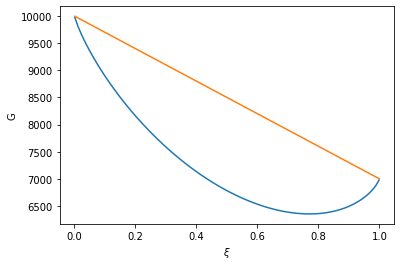

In [113]:
plt.plot(xi,Grxn)
plt.plot(xi,Gpure)
plt.xlabel(r"$\xi$")
plt.ylabel(r"G")
plt.show() # plot Gpure and Grxn

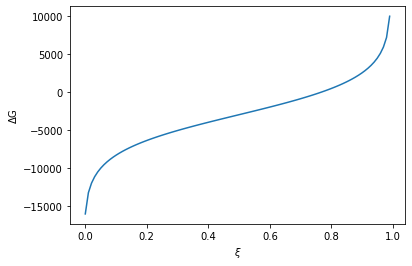

In [114]:
dxi = xi[1]-xi[0]
dGapprox=np.diff(Grxn)/dxi #take derivative to get slope=DG
plt.plot(xi[:-1],dGapprox)
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\Delta$G")
plt.show()

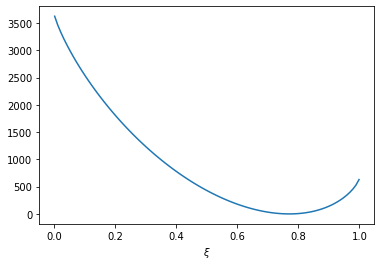

In [117]:
Gproposed=Grxn-min(Grxn) # if DG were the difference between each piont and the minimum...
plt.plot(xi,Gproposed)
plt.xlabel(r"$\xi$")
plt.show()

If the proposed relation to $\Delta$G were correct, the last two plots should match. I guess it makes sense that subtracting the minimum would just translate the minimum down to 0 and shift the whole plot down but not change its shape. But I didn't think about that until I saw it plotted.